<a href="https://colab.research.google.com/github/zeynepsenatatli/MachineLearningExercises/blob/main/UE02_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**
<br>
**QUESTION:** Generate a dataset using any quadratic or third-degree polynomial function. It should contain at least 100 data samples. Implement the following steps;
* Use linear regression closed-form solution or Singular Value Decomposition
(SVD) methods (eg, using the least-squares package) to solve the regression problem.
* Use regularized linear models (ridge, LASSO and ElasticNet) to solve the regression problem.
* Compare and interpret the results. You are allowed to use scipy and scikit-learn tools.





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature

In [ ]:
np.random.seed(42)

# Generate dataset using a quadratic function
m = 100
X = 2 * np.random.rand(m, 1)
y = 5 + 2*X**2 + np.random.randn(m, 1)  # 2x^2 + 5

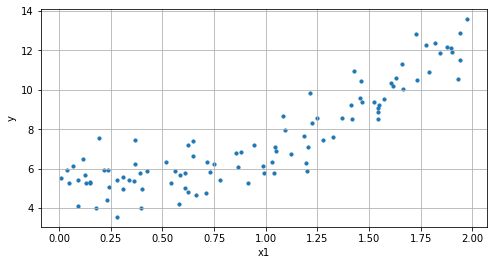

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)

plt.scatter(X, y, s=10)

plt.xlabel('x1')
plt.ylabel('y')
plt.show()

### Normal Equation

In [ ]:
X_b = add_dummy_feature(X) # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(theta_best)

[[4.02312165]
 [3.6637794 ]]


In [ ]:
X_new = np.array([[0], [1], [2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.02312165],
       [ 7.68690105],
       [11.35068045]])

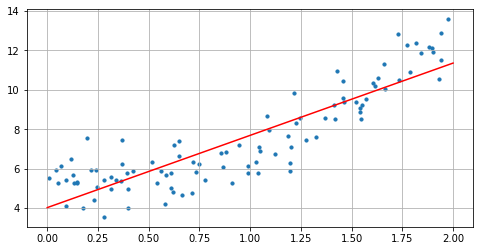

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.scatter(X, y, s=10)
plt.show()

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
coefficients = ridge_reg.coef_
intercept = ridge_reg.intercept_

print(intercept)
print(coefficients)

[4.11870171]
[[3.56213757]]


### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(X, y)
coefficients = lasso_reg.coef_
intercept = lasso_reg.intercept_

print(intercept)
print(coefficients)

[5.36473271]
[2.23708225]


### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net.fit(X, y)
coefficients = elastic_net.coef_
intercept = elastic_net.intercept_

print(intercept)
print(coefficients)

[5.84907175]
[1.72202602]


### Error Difference

In [ ]:
from sklearn.metrics import mean_squared_error

# Linear regression
lin_reg_pred = X_b @ theta_best
lin_mse = mean_squared_error(y, lin_reg_pred)

# Ridge regression
ridge_reg_pred = ridge_reg.predict(X)
ridge_mse = mean_squared_error(y, ridge_reg_pred)

# Lasso regression
lasso_reg_pred = lasso_reg.predict(X)
lasso_mse = mean_squared_error(y, lasso_reg_pred)

# Elastic Net regression
elastic_reg_pred = elastic_net.predict(X)
elastic_mse = mean_squared_error(y, elastic_reg_pred)

In [ ]:
print("Linear Regression MSE:", lin_mse)
print("Ridge Regression MSE:", ridge_mse)
print("Lasso Regression MSE:", lasso_mse)
print("Elastic Net Regression MSE:", elastic_mse)

Linear Regression MSE: 1.3571066102061033
Ridge Regression MSE: 1.3607272320376165
Lasso Regression MSE: 2.0704551868934256
Elastic Net Regression MSE: 2.6784824164489436


### Graph

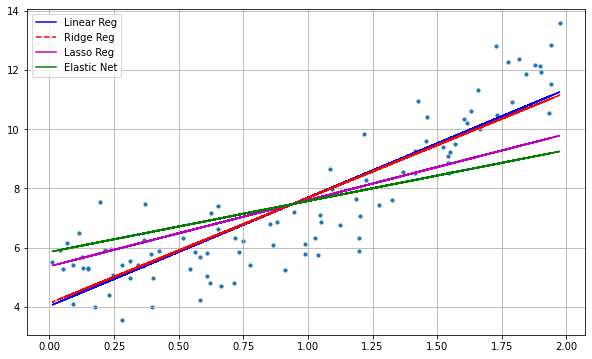

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.scatter(X, y, s=10)
plt.plot(X, lin_reg_pred, "b", label="Linear Reg")
plt.plot(X, ridge_reg_pred, "r--", label="Ridge Reg")
plt.plot(X, lasso_reg_pred, "m", label="Lasso Reg")
plt.plot(X, elastic_reg_pred, "g", label="Elastic Net")
plt.legend(loc="upper left")
plt.show()